# All Sites- Analysis 3 
* looking at the duration of unloading for each event
* duration of unloading scatter matrix figures 

In [78]:
# import packages 
%matplotlib widget

# plotting packages 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 

# interactive plotting
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots # adding for subplots
import plotly.figure_factory as ff

# data packages 
import pandas as pd
import numpy as np
import xarray as xr
from datetime import datetime

import csv 
import copy 
import os.path 

# Open the event and duration datasets

In [79]:
opn_events = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/laret_open_events_edit.csv")
sod_events = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/sodankyla_events_edit.csv")
niw_events = pd.read_csv("/Users/Lumbr/OneDrive - UW/Documents/Washington/UnloadingRegimes/OtherSites/Classifications/niwot_events_edit.csv")

In [80]:
# Only save the unloading events information
opn_events.CD = opn_events.CD.where(opn_events.CD == 0).dropna()
opn_events.dropna(inplace=True)

sod_events.CD = sod_events.CD.where(sod_events.CD == 0).dropna()
sod_events.dropna(inplace=True)

niw_events.CD = niw_events.CD.where(niw_events.CD == 0).dropna()
niw_events.dropna(inplace=True)

In [81]:
opn_events['datetime']=opn_events['time_max'].copy(deep=True)
sod_events['datetime']=sod_events['time_max'].copy(deep=True)
niw_events['datetime']=niw_events['time_max'].copy(deep=True)

In [82]:
opn_events.index = pd.DatetimeIndex(opn_events['datetime'])
opn_events.drop(columns=['datetime'], inplace=True)

sod_events.index = pd.DatetimeIndex(sod_events['datetime'])
sod_events.drop(columns=['datetime'], inplace=True)

niw_events.index = pd.DatetimeIndex(niw_events['datetime'])
niw_events.drop(columns=['datetime'], inplace=True)

In [83]:
# LARET 
# Create symbols for type 1 and type 2 
opn_events['TypeSymbol'] = np.nan

# open diamont for type 1, diamond for type 2, open x circle for no classification
opn_events['TypeSymbol'].mask(opn_events['Type'] == 1, 102, inplace=True) # part unloading
opn_events['TypeSymbol'].mask(opn_events['Type'] == 2., 2, inplace=True)  # full unloading

# then fillna with 128 for circle with x through it 
opn_events['TypeSymbol'] = opn_events['TypeSymbol'].fillna(128)  

# SODANKYLA
# Create symbols for type 1 and type 2 
sod_events['TypeSymbol'] = np.nan

# open diamont for type 1, diamond for type 2, open x circle for no classification
sod_events['TypeSymbol'].mask(sod_events['Type'] == 1, 102, inplace=True) 
sod_events['TypeSymbol'].mask(sod_events['Type'] == 2., 2, inplace=True)    

# then fillna with 128 for circle with x through it 
sod_events['TypeSymbol'] = sod_events['TypeSymbol'].fillna(128)  

# NIWOT
# Create symbols for type 1 and type 2 
niw_events['TypeSymbol'] = np.nan

# open diamont for type 1, diamond for type 2, open x circle for no classification
niw_events['TypeSymbol'].mask(niw_events['Type'] == 1, 102, inplace=True) 
niw_events['TypeSymbol'].mask(niw_events['Type'] == 2., 2, inplace=True)    

# then fillna with 128 for circle with x through it 
niw_events['TypeSymbol'] = niw_events['TypeSymbol'].fillna(128)  

## Plot

In [84]:
## Define some plotting constants for easier coding 
plt.close('all')

# Colors
colornosnow = '#D2B48C' # nice tan
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 
unloadcolors = [colorsnow, colorsnowunload]

# Names
namesnow = 'Snow Staying'
namesnowunload = 'Snow Unloading'
group_labels = ['Snow Staying', 'Snow Unloading']

nametemp = "Air Temperature (C)"
namewind = "Wind Speed (m/s)"
nameSW = "Shortwave (W/m2)"

namesodankyla = 'A)  Sodankyla, Finland'
namesod = 'A)  Sodankyla, Finland'
namelaret = 'B)  Davos Laret, Switzerland'
nameniwot = 'C)  Niwot Ridge, Colorado, USA'

# namelaret = 'Laret, Switzerland: Colored by duration of unloading event (hours)'
# nameniwot = 'Niwot Ridge, Colorado, USA: Colored by duration of unloading event (hours) '
# namesodankyla = 'Sodankyla, Finland: Colored by duration of unloading event (hours)'

## Scatter matrix
* with the same limits on the colorbar 
* now, need to figure out the limits on the axes

In [85]:
# State which site we are working with 
df = opn_events.copy(deep=True)

# Some constatns 
index_vals = df['count']
index_symbols = df['TypeSymbol']
# colorbar = 'blues'
colorbar = 'cividis_r'

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale = colorbar, symbol = index_symbols, showscale=True, line_width=2, size=12, cmin=0, cmax=12),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False))

fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))

fig.update_layout(title=namelaret, width=800, height=700, dragmode='select')

fig.show()

In [86]:
# State which site we are working with 
df = sod_events.copy(deep=True)

# Some constatns 
index_vals = df['count']
index_symbols = df['TypeSymbol']
colorbar = 'cividis_r'

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale = colorbar, symbol = index_symbols, showscale=True, line_width=2, size=12, cmin=0, cmax=12),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False))

fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))

fig.update_layout(title=namesodankyla, width=800, height=700, dragmode='select')

fig.show()

In [87]:
# State which site we are working with 
df = niw_events.copy(deep=True)

# Some constatns 
index_vals = df['count']
index_symbols = df['TypeSymbol']
colorbar = 'cividis_r'

# index_symbols = df['CD']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale = colorbar, symbol = index_symbols, showscale=True, line_width=2, size=12, cmin=0, cmax=12),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False))

fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))

fig.update_layout(title=nameniwot, width=800, height=700, dragmode='select')


fig.show()

In [88]:
fig = make_subplots(rows=3, cols=2, 
                    subplot_titles=(namesod, namelaret, nameniwot), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.08, horizontal_spacing=0.1,
)

linewidth = 2
markersize = 12
colorbar = 'cividis_r'
cmin = 0 
cmax = 10

# Sodankyla (only temp x wind)
fig.add_trace(
    go.Scatter(
        x = sod_events['temp'],
        y = sod_events['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=sod_events['count'], 
        colorscale=colorbar, 
        symbol=sod_events['TypeSymbol'],
        showscale=True,
        cmin=cmin, cmax=cmax,
        line=dict(width=linewidth),
        )
    ), row=1, col=1
)

fig.update_xaxes(title_text = nametemp, range=[-20,8], row=1, col=1) 
fig.update_yaxes(title_text = namewind, range=[-.5,15], row=1, col=1) 

# Davos, Laret (only temp x sw)
fig.add_trace(
    go.Scatter(
        x = opn_events['temp'],
        y = opn_events['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=opn_events['count'], 
        colorscale=colorbar, 
        symbol=opn_events['TypeSymbol'],
        showscale=False,
        cmin=cmin, cmax=cmax,
        line=dict(width=linewidth),
        )
    ), row=1, col=2
)

fig.update_xaxes(title_text = nametemp, range=[-20,8], row=1, col=2) 
fig.update_yaxes(title_text = nameSW, range=[-50,1200], row=1, col=2)


# Niwot, full scatter matrix 
fig.add_trace(
    go.Scatter(
        x = niw_events['temp'],
        y = niw_events['windspeed'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=niw_events['count'], 
        colorscale=colorbar, 
        symbol=niw_events['TypeSymbol'],
        showscale=False,
        cmin=cmin, cmax=cmax,
        line=dict(width=linewidth),
        )
    ), row=2, col=1
)

fig.update_xaxes(title_text = nametemp, range=[-20,8], row=2, col=1) 
fig.update_yaxes(title_text = namewind, range=[-.5,15], row=2, col=1) 

fig.add_trace(
    go.Scatter(
        x = niw_events['temp'],
        y = niw_events['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=niw_events['count'], 
        colorscale=colorbar, 
        symbol=niw_events['TypeSymbol'],
        showscale=False,
        cmin=cmin, cmax=cmax,
        line=dict(width=linewidth),
        )
    ), row=3, col=1
)

fig.update_xaxes(title_text = nametemp, range=[-20,8], row=3, col=1) 
fig.update_yaxes(title_text = nameSW, range=[-50,1200], row=3, col=1)

fig.add_trace(
    go.Scatter(
        x = niw_events['windspeed'],
        y = niw_events['shortwave'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=niw_events['count'], 
        colorscale=colorbar, 
        symbol=niw_events['TypeSymbol'],
        showscale=False,
        cmin=cmin, cmax=cmax,
        line=dict(width=linewidth),
        )
    ), row=3, col=2
)

# Update labels and titles 

# this works but it looks weird.. so removing for now (and it somehow removes the plot titles, weird)
# fig.update_layout(
#     annotations=[
#         dict(
#             text="duration of unloading event (hours)",
#             font_size=18,
#             font_family='arial',
#             # font_color='black',
#             textangle=90,
#             showarrow=True,
#             xref="paper",
#             yref="paper",
#             x=1.1,
#             y=0.5,
#         )
#     ]
# )

fig.update_xaxes(title_text = namewind, range=[-.5,15], row=3, col=2) 
fig.update_yaxes(title_text = nameSW, range=[-50,1200], row=3, col=2)

fig.update_layout(title='', width=1000, height=1200, showlegend=False)



fig.show()

## Put all the sites together in a single scatter plot

In [89]:
# alldf = pd.DataFrame()
# alldf

# alldf['allcount'] = niw_events['count']
# alldf['alltemp'] = niw_events['temp']
# alldf['allsw'] = niw_events['shortwave']
# alldf['allwind'] = niw_events['windspeed']
# alldf['allsymbol'] = niw_events['TypeSymbol']
# alldf = alldf.reset_index(drop=True)
# alldf

# don't need to do any of this, just use concat 

In [90]:
df_all = pd.concat([niw_events, sod_events, opn_events])
df_all

,event,time_min,time_max,count,shortwave,temp,windspeed,CD,Type,TypeSymbol
datetime,,,,,,,,,,
2016-10-06 15:00:00,2,10/6/2016 11:00,10/6/2016 15:00,5,513.968000,-1.542600,3.898000,0.0,2.0,2.0
2016-10-12 10:00:00,4,10/12/2016 9:00,10/12/2016 10:00,2,683.805000,3.717500,2.870000,0.0,2.0,2.0
2016-10-19 09:00:00,6,10/19/2016 9:00,10/19/2016 9:00,1,394.135000,-2.545000,3.920000,0.0,2.0,2.0
2016-11-02 08:00:00,8,11/2/2016 8:00,11/2/2016 8:00,1,333.890000,0.783000,1.037500,0.0,2.0,2.0
2016-11-18 14:00:00,10,11/18/2016 12:00,11/18/2016 14:00,3,499.726667,-8.328333,3.178333,0.0,1.0,102.0
...,...,...,...,...,...,...,...,...,...,...
2021-04-18 09:00:00,57,4/18/2021 9:00,4/18/2021 9:00,1,461.593333,-0.507563,1.624342,0.0,2.0,2.0
2021-04-19 11:00:00,59,4/19/2021 10:00,4/19/2021 11:00,2,503.267500,0.987025,2.005967,0.0,2.0,2.0
2021-04-22 08:00:00,61,4/22/2021 8:00,4/22/2021 8:00,1,460.213333,3.203750,1.560375,0.0,2.0,2.0


In [91]:
# State which site we are working with 

# Some constatns 
index_vals = df_all['count']
index_symbols = df_all['TypeSymbol']
colorbar = 'cividis_r'

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df_all['temp']),
                                   dict(label=namewind, values=df_all['windspeed']),
                                   dict(label=nameSW,   values=df_all['shortwave'])],
                                   marker=dict(color=index_vals, colorscale = colorbar, symbol = index_symbols, showscale=True, line_width=1, size=9, cmin=0, cmax=12),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False))

fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))

fig.update_layout(title="Duration of Unloading Events for All Sites", width=800, height=700, dragmode='select')


fig.show()

In [92]:
# Colors
colornosnow = '#D2B48C' # nice tan
colorsnow = '#7dcfd4' # slightly desaturated cyan
colorsnowunload = '#1F15D5' # bright, deep blue 
colorsunny = '#E4E44A' # trying a little less bright 
unloadcolors = [colorsnow, colorsnowunload]
colorscaled = [[0., colorsnowunload], [1, colorsnow]]

In [93]:
fig = make_subplots(rows=1, cols=2, 
                    # subplot_titles=("All Wind Speeds", "Wind Speeds < 5 m/s"), 
                    shared_xaxes=False, shared_yaxes=False, 
                    vertical_spacing=0.02, horizontal_spacing=0.2,
)

markersize = 8

# All sites with temperature
fig.add_trace(
    go.Scatter(
        x = df_all['count'],
        y = df_all['temp'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=df_all['CD'], 
        colorscale=colorscaled, 
        symbol=df_all['TypeSymbol'],
        showscale=False
        )
    ), row=1, col=1
)

# fig.update_xaxes(title_text = nametemp, range=[-35,8],   row=1, col=1) 
# fig.update_yaxes(title_text = nameSW,   range=[-50,1200], row=1, col=1)

fig.update_layout(title='All Sites', width=1000, height=500, showlegend=False)
fig.show()

In [94]:
fig = make_subplots(rows=3, cols=1, 
                    # subplot_titles=("All Wind Speeds", "Wind Speeds < 5 m/s"), 
                    shared_xaxes=False, shared_yaxes=True, 
                    vertical_spacing=0.08, horizontal_spacing=0.2,
)

markersize = 8

# All sites with temperature
fig.add_trace(
    go.Scatter(
        x = df_all['temp'],
        y = df_all['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all['TypeSymbol'],
        showscale=False
        )
    ), row=1, col=1
)

# All sites with shortwave
fig.add_trace(
    go.Scatter(
        x = df_all['shortwave'],
        y = df_all['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all['TypeSymbol'],
        showscale=False
        )
    ), row=2, col=1
)

# All sites with wind speed
fig.add_trace(
    go.Scatter(
        x = df_all['windspeed'],
        y = df_all['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all['TypeSymbol'],
        showscale=False
        )
    ), row=3, col=1
)

fig.update_yaxes(title_text = "", range=[-0.5,12.55],  row=1, col=1) 
fig.update_yaxes(title_text = "duration of unloading event (hours)", range=[-0.5,12.55],  row=2, col=1) 
fig.update_yaxes(title_text = "", range=[-0.5,12.55],  row=3, col=1) 

fig.update_xaxes(title_text = nametemp, range=[-35,8],    row=1, col=1) 
fig.update_xaxes(title_text = nameSW,   range=[-50,1200], row=2, col=1)
fig.update_xaxes(title_text = namewind, range=[-.5,15],  row=3, col=1)

fig.update_layout(title='Duration of Unloading Event for All Sites', width=1000, height=800, showlegend=False)
fig.show()

In [95]:
df_all.head()

,event,time_min,time_max,count,shortwave,temp,windspeed,CD,Type,TypeSymbol
datetime,,,,,,,,,,
2016-10-06 15:00:00,2,10/6/2016 11:00,10/6/2016 15:00,5,513.968000,-1.542600,3.898000,0.0,2.0,2.0
2016-10-12 10:00:00,4,10/12/2016 9:00,10/12/2016 10:00,2,683.805000,3.717500,2.870000,0.0,2.0,2.0
2016-10-19 09:00:00,6,10/19/2016 9:00,10/19/2016 9:00,1,394.135000,-2.545000,3.920000,0.0,2.0,2.0
2016-11-02 08:00:00,8,11/2/2016 8:00,11/2/2016 8:00,1,333.890000,0.783000,1.037500,0.0,2.0,2.0
2016-11-18 14:00:00,10,11/18/2016 12:00,11/18/2016 14:00,3,499.726667,-8.328333,3.178333,0.0,1.0,102.0


In [96]:
# niwot_df_unload_negative = niwot_df_unload.where(niwot_df_unload.temp < 0).dropna(axis=0, how='any', subset=['CD']) # threshold right at 0
df_all_negative = df_all.where(df_all.temp < -1).dropna(axis=0, how='any', subset=['CD']) # threshold at -1, negative only
df_all_positive = df_all.where(df_all.temp > 0).dropna(axis=0, how='any', subset=['CD']) # threshold at 0, positive only

df_all_negative_full = df_all.where((df_all.temp < -1) & (df_all.Type == 2)).dropna(axis=0, how='any', subset=['CD']) # threshold at -1, negative only full unloading
df_all_negative_part = df_all.where((df_all.temp < -1) & (df_all.Type == 1)).dropna(axis=0, how='any', subset=['CD']) # threshold at -1, negative only part unloading

df_all_positive_full = df_all.where((df_all.temp > 0) & (df_all.Type == 2)).dropna(axis=0, how='any', subset=['CD']) # threshold at 0, positive only full unloading
df_all_positive_part = df_all.where((df_all.temp > 0) & (df_all.Type == 1)).dropna(axis=0, how='any', subset=['CD']) # threshold at 0, positive only part unloading

# niwot_df_unload_windlow = niwot_df_unload.where(niwot_df_unload.windspeed < 5).dropna(axis=0, how='any', subset=['CD'])
# niwot_df_unload_windhigh = niwot_df_unload.where(niwot_df_unload.windspeed >= 5).dropna(axis=0, how='any', subset=['CD'])

In [97]:
fig = make_subplots(rows=3, cols=2, 
                    subplot_titles=("Negative Temperatures (T < 0 C)", "Positive Temperatures (T > 0 C)"), 
                    shared_xaxes=False, shared_yaxes=True, 
                    vertical_spacing=0.09, horizontal_spacing=0.02,
)

markersize = 8

# COLUMN 1 
# All sites with temperature
fig.add_trace(
    go.Scatter(
        x = df_all_negative['temp'],
        y = df_all_negative['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_negative['TypeSymbol'],
        showscale=False
        )
    ), row=1, col=1
)

# All sites with shortwave
fig.add_trace(
    go.Scatter(
        x = df_all_negative['shortwave'],
        y = df_all_negative['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_negative['TypeSymbol'],
        showscale=False
        )
    ), row=2, col=1
)

# All sites with wind speed
fig.add_trace(
    go.Scatter(
        x = df_all_negative['windspeed'],
        y = df_all_negative['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_negative['TypeSymbol'],
        showscale=False
        )
    ), row=3, col=1
)

# COLUMN 2 
# All sites with temperature
fig.add_trace(
    go.Scatter(
        x = df_all_positive['temp'],
        y = df_all_positive['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_positive['TypeSymbol'],
        showscale=False
        )
    ), row=1, col=2
)

# All sites with shortwave
fig.add_trace(
    go.Scatter(
        x = df_all_positive['shortwave'],
        y = df_all_positive['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_positive['TypeSymbol'],
        showscale=False
        )
    ), row=2, col=2
)

# All sites with wind speed
fig.add_trace(
    go.Scatter(
        x = df_all_positive['windspeed'],
        y = df_all_positive['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_positive['TypeSymbol'],
        showscale=False
        )
    ), row=3, col=2
)

fig.update_yaxes(title_text = "", range=[-0.5,12.55],  row=1, col=1) 
fig.update_yaxes(title_text = "duration of unloading event (hours)", range=[-0.5,12.55],  row=2, col=1) 
fig.update_yaxes(title_text = "", range=[-0.5,12.55],  row=3, col=1) 

# fig.update_xaxes(title_text = nametemp, range=[-35,8],    row=1, col=1) 
fig.update_xaxes(title_text = nametemp, range=[-20,0.1],    row=1, col=1) 

fig.update_xaxes(title_text = nameSW,   range=[-50,1200], row=2, col=1)
fig.update_xaxes(title_text = namewind, range=[-.5,15],  row=3, col=1)

# fig.update_xaxes(title_text = nametemp, range=[-35,8],    row=1, col=2) 
fig.update_xaxes(title_text = nametemp, range=[-0.04,8],    row=1, col=2) 

fig.update_xaxes(title_text = nameSW,   range=[-50,1200], row=2, col=2)
fig.update_xaxes(title_text = namewind, range=[-.5,15],  row=3, col=2)

fig.update_layout(title='Duration of Unloading Event for All Sites', width=1000, height=800, showlegend=False)
fig.show()

In [98]:
df_all_neg_sticky = df_all.where((df_all.temp < 0) & (df_all.temp >= -3)).dropna(axis=0, how='any', subset=['CD']) # sticky snow between 0 and -3 
df_all_neg_coldhs = df_all.where((df_all.temp < -3)).dropna(axis=0, how='any', subset=['CD']) # cold snow, below -3 

In [99]:
fig = make_subplots(rows=3, cols=2, 
                    subplot_titles=("Cold Snow (T < -3 C)", "Sticky Snow (-3 < T < 0 C)"), 
                    shared_xaxes=False, shared_yaxes=True, 
                    vertical_spacing=0.09, horizontal_spacing=0.02,
)

markersize = 8

# COLUMN 1 
# All sites with temperature
fig.add_trace(
    go.Scatter(
        x = df_all_neg_coldhs['temp'],
        y = df_all_neg_coldhs['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_neg_coldhs['TypeSymbol'],
        showscale=False
        )
    ), row=1, col=1
)

# All sites with shortwave
fig.add_trace(
    go.Scatter(
        x = df_all_neg_coldhs['shortwave'],
        y = df_all_neg_coldhs['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_neg_coldhs['TypeSymbol'],
        showscale=False
        )
    ), row=2, col=1
)

# All sites with wind speed
fig.add_trace(
    go.Scatter(
        x = df_all_neg_coldhs['windspeed'],
        y = df_all_neg_coldhs['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_neg_coldhs['TypeSymbol'],
        showscale=False
        )
    ), row=3, col=1
)

# COLUMN 2 
# All sites with temperature
fig.add_trace(
    go.Scatter(
        x = df_all_neg_sticky['temp'],
        y = df_all_neg_sticky['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_neg_sticky['TypeSymbol'],
        showscale=False
        )
    ), row=1, col=2
)

# All sites with shortwave
fig.add_trace(
    go.Scatter(
        x = df_all_neg_sticky['shortwave'],
        y = df_all_neg_sticky['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_neg_sticky['TypeSymbol'],
        showscale=False
        )
    ), row=2, col=2
)

# All sites with wind speed
fig.add_trace(
    go.Scatter(
        x = df_all_neg_sticky['windspeed'],
        y = df_all_neg_sticky['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all_neg_sticky['TypeSymbol'],
        showscale=False
        )
    ), row=3, col=2
)

fig.update_yaxes(title_text = "", range=[-0.5,12.55],  row=1, col=1) 
fig.update_yaxes(title_text = "duration of unloading event (hours)", range=[-0.5,12.55],  row=2, col=1) 
fig.update_yaxes(title_text = "", range=[-0.5,12.55],  row=3, col=1) 

# fig.update_xaxes(title_text = nametemp, range=[-35,8],    row=1, col=1) 
# fig.update_xaxes(title_text = nametemp, range=[-20,0.1],    row=1, col=1) 

fig.update_xaxes(title_text = nameSW,   range=[-50,1200], row=2, col=1)
fig.update_xaxes(title_text = namewind, range=[-.5,15],  row=3, col=1)

# fig.update_xaxes(title_text = nametemp, range=[-35,8],    row=1, col=2) 
# fig.update_xaxes(title_text = nametemp, range=[-0.04,8],    row=1, col=2) 

fig.update_xaxes(title_text = nameSW,   range=[-50,1200], row=2, col=2)
fig.update_xaxes(title_text = namewind, range=[-.5,15],  row=3, col=2)

fig.update_layout(title='Duration of Unloading Event for All Sites: Negative Temperatures', width=1000, height=800, showlegend=False)
fig.show()

In [100]:
positive = df_all_positive['count'].mean()
negative = df_all_negative['count'].mean()

sticky = df_all_neg_sticky['count'].mean()
coldhs = df_all_neg_coldhs['count'].mean()

print("Mean duration of unloading for positive temps", positive)
print("Mean duration of unloading for negative temps", negative)
print("Mean duration of unloading for sticky snow: ", sticky)
print("Mean duration of unloading for cold   snow: ", coldhs)

Mean duration of unloading for positive temps 3.7027027027027026
Mean duration of unloading for negative temps 3.481012658227848
Mean duration of unloading for sticky snow:  3.935483870967742
Mean duration of unloading for cold   snow:  3.2264150943396226


In [101]:
negative_full = df_all_negative_full['count'].mean()
negative_part = df_all_negative_part['count'].mean()

positive_full = df_all_positive_full['count'].mean()
positive_part = df_all_positive_part['count'].mean()

print("Mean duration of unloading for positive temps part unloading", positive_part)
print("Mean duration of unloading for positive temps full unloading", positive_full)

print("Mean duration of unloading for negative temps part unloading", negative_part)
print("Mean duration of unloading for negative temps full unloading", negative_full)

Mean duration of unloading for positive temps part unloading 5.818181818181818
Mean duration of unloading for positive temps full unloading 2.8076923076923075
Mean duration of unloading for negative temps part unloading 3.1639344262295084
Mean duration of unloading for negative temps full unloading 4.555555555555555


In [102]:
d = {"neg_part": df_all_negative_part['count'].reset_index(drop=True),  
     "neg_full": df_all_negative_full['count'].reset_index(drop=True), 
     "pos_part": df_all_positive_part['count'].reset_index(drop=True),
     "pos_full": df_all_positive_full['count'].reset_index(drop=True), 
     }

df_count = pd.DataFrame(d)
df_count

,neg_part,neg_full,pos_part,pos_full
0,3.0,5.0,3.0,2.0
1,2.0,1.0,5.0,1.0
2,1.0,2.0,7.0,5.0
3,3.0,5.0,6.0,1.0
4,6.0,13.0,3.0,2.0
...,...,...,...,...
56,9.0,NaN,NaN,NaN
57,4.0,NaN,NaN,NaN
58,12.0,NaN,NaN,NaN
59,3.0,NaN,NaN,NaN


In [103]:
plt.close()
# sns.boxplot(data=df_count)

<AxesSubplot:>

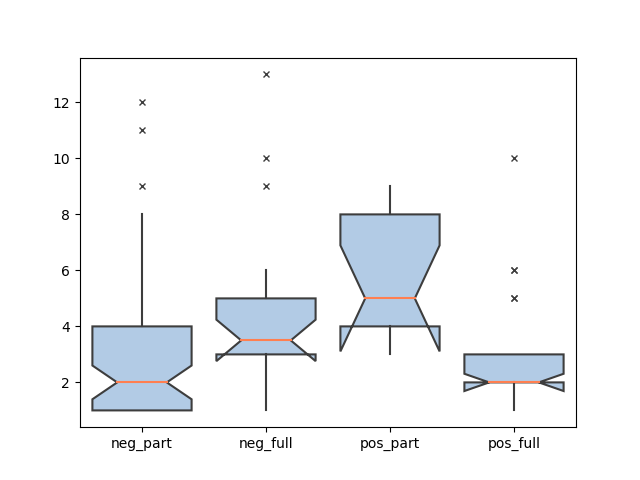

In [104]:
sns.boxplot(
    data=df_count,
    notch=True, showcaps=False,
    flierprops={"marker": "x"},
    boxprops={"facecolor": (.4, .6, .8, .5)},
    medianprops={"color": "coral"},
)

In [169]:
df_all['temperature_string']    = np.nan
df_all['classification'] = np.nan

df_all['temperature_string'].where(df_all.temp >= 0, "negative", inplace=True)
df_all['temperature_string'].where(df_all.temp <  0, "positive", inplace=True)
df_all['classification'].where(df_all.Type ==1, "full unloading", inplace=True)
df_all['classification'].where(df_all.Type ==2, "partial unloading", inplace=True)
df_all.head()

,event,time_min,time_max,count,shortwave,temp,windspeed,CD,Type,TypeSymbol,isNegative,Temperature,Classification,temperature,classification,temperature_string
datetime,,,,,,,,,,,,,,,,
2016-10-06 15:00:00,2,10/6/2016 11:00,10/6/2016 15:00,5,513.968000,-1.542600,3.898000,0.0,2.0,2.0,negative,negative,full unloading,negative,full unloading,negative
2016-10-12 10:00:00,4,10/12/2016 9:00,10/12/2016 10:00,2,683.805000,3.717500,2.870000,0.0,2.0,2.0,positive,positive,full unloading,positive,full unloading,positive
2016-10-19 09:00:00,6,10/19/2016 9:00,10/19/2016 9:00,1,394.135000,-2.545000,3.920000,0.0,2.0,2.0,negative,negative,full unloading,negative,full unloading,negative
2016-11-02 08:00:00,8,11/2/2016 8:00,11/2/2016 8:00,1,333.890000,0.783000,1.037500,0.0,2.0,2.0,positive,positive,full unloading,positive,full unloading,positive
2016-11-18 14:00:00,10,11/18/2016 12:00,11/18/2016 14:00,3,499.726667,-8.328333,3.178333,0.0,1.0,102.0,negative,negative,partial unloading,negative,partial unloading,negative


In [171]:
fig = px.box(df_all, y="temperature_string", x="count", color="classification", notched=True, color_discrete_sequence=['blue', 'darkorange'])

fig.update_layout(title='Duration of unloading events for all sites', 
    xaxis=dict(title='duration of unloading (hours)'),
    yaxis=dict(title='temperature') 
    # legend=dict(yanchor='top', y=0.985, xanchor='right', x=0.995)
    )
fig.update_layout(legend_traceorder="reversed")
fig.show()

Now, look at wind and shortwave for negative temperatures only

In [178]:
df_all_negative['windspeed_string']    = np.nan
df_all_negative['shortwave_string']    = np.nan
df_all_negative['classification']      = np.nan

df_all_negative['windspeed_string'].where(df_all_negative.windspeed >= 5, "low", inplace=True)
df_all_negative['windspeed_string'].where(df_all_negative.windspeed <  5, "high", inplace=True)
df_all_negative['shortwave_string'].where(df_all_negative.shortwave >= 500, "low", inplace=True)
df_all_negative['shortwave_string'].where(df_all_negative.shortwave <  500, "high", inplace=True)
df_all_negative['classification'].where(df_all_negative.Type ==1, "full unloading", inplace=True)
df_all_negative['classification'].where(df_all_negative.Type ==2, "partial unloading", inplace=True)

df_all_negative.head()

,event,time_min,time_max,count,shortwave,temp,windspeed,CD,Type,TypeSymbol,windspeed_string,classification,shortwave_string
datetime,,,,,,,,,,,,,
2016-10-06 15:00:00,2.0,10/6/2016 11:00,10/6/2016 15:00,5.0,513.968000,-1.542600,3.898000,0.0,2.0,2.0,low,full unloading,high
2016-10-19 09:00:00,6.0,10/19/2016 9:00,10/19/2016 9:00,1.0,394.135000,-2.545000,3.920000,0.0,2.0,2.0,low,full unloading,low
2016-11-18 14:00:00,10.0,11/18/2016 12:00,11/18/2016 14:00,3.0,499.726667,-8.328333,3.178333,0.0,1.0,102.0,low,partial unloading,low
2016-11-24 11:00:00,12.0,11/24/2016 10:00,11/24/2016 11:00,2.0,580.707500,-8.655000,12.797500,0.0,2.0,2.0,high,full unloading,high
2016-12-05 13:00:00,14.0,12/5/2016 12:00,12/5/2016 13:00,2.0,114.895000,-7.857500,3.610000,0.0,1.0,102.0,low,partial unloading,low


In [177]:
fig = px.box(df_all_negative, y="windspeed_string", x="count", color="classification", notched=True, color_discrete_sequence=['blue', 'darkorange'])

fig.update_layout(title='Duration of unloading events for all sites', 
    xaxis=dict(title='duration of unloading (hours)'),
    yaxis=dict(title='wind speed') 
    # legend=dict(yanchor='top', y=0.985, xanchor='right', x=0.995)
    )
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [179]:
fig = px.box(df_all_negative, y="shortwave_string", x="count", color="classification", notched=True, color_discrete_sequence=['blue', 'darkorange'])

fig.update_layout(title='Duration of unloading events for all sites', 
    xaxis=dict(title='duration of unloading (hours)'),
    yaxis=dict(title='shortwave') 
    # legend=dict(yanchor='top', y=0.985, xanchor='right', x=0.995)
    )
fig.update_layout(legend_traceorder="reversed")
fig.show()

In [54]:
fig = make_subplots(rows=3, cols=1, 
                    # subplot_titles=("All Wind Speeds", "Wind Speeds < 5 m/s"), 
                    shared_xaxes=True, shared_yaxes=False, 
                    vertical_spacing=0.02, horizontal_spacing=0.2,
)

markersize = 8

# All sites with temperature
fig.add_trace(
    go.Scatter(
        y = df_all['temp'],
        x = df_all['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all['TypeSymbol'],
        showscale=False
        )
    ), row=1, col=1
)

# All sites with shortwave
fig.add_trace(
    go.Scatter(
        y = df_all['shortwave'],
        x = df_all['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all['TypeSymbol'],
        showscale=False
        )
    ), row=2, col=1
)

# All sites with wind speed
fig.add_trace(
    go.Scatter(
        y = df_all['windspeed'],
        x = df_all['count'],
        mode='markers',
        marker=dict(
        size=markersize,
        color=colorsnowunload, 
        # colorscale=colorscaled, 
        symbol=df_all['TypeSymbol'],
        showscale=False
        )
    ), row=3, col=1
)

fig.update_xaxes(title_text = "", range=[-0.5,12.55],  row=1, col=1) 
fig.update_xaxes(title_text = "duration of unloading event (hours)", range=[-0.5,12.55],  row=3, col=1) 
fig.update_xaxes(title_text = "", range=[-0.5,12.55],  row=2, col=1) 

fig.update_yaxes(title_text = nametemp, range=[-35,8],    row=1, col=1) 
fig.update_yaxes(title_text = nameSW,   range=[-50,1200], row=2, col=1)
fig.update_yaxes(title_text = namewind, range=[-.5,15],  row=3, col=1)

fig.update_layout(title='Duration of Unloading Event for All Sites', width=1000, height=700, showlegend=False)
fig.show()

# Only full unloading events

In [15]:
# Only full unloading events 
opn_events.Type = opn_events.Type.where(opn_events.Type == 2).dropna()
opn_events.dropna(inplace=True)

sod_events.Type = sod_events.Type.where(sod_events.Type == 2).dropna()
sod_events.dropna(inplace=True)

niw_events.Type = niw_events.Type.where(niw_events.Type == 2).dropna()
niw_events.dropna(inplace=True)

In [97]:
# State which site we are working with 
df = opn_events.copy(deep=True)
# df = sod_events.copy(deep=True)
# df = niw_events.copy(deep=True)

# Some constatns 
index_vals = df['count']
index_symbols = df['TypeSymbol']
# colorbar = 'blues_r'
colorbar = 'viridis_r'

# index_symbols = df['CD']

fig = go.Figure()
fig.add_trace(go.Splom(dimensions=[dict(label=nametemp, values=df['temp']),
                                   dict(label=namewind, values=df['windspeed']),
                                   dict(label=nameSW,   values=df['shortwave'])],
                                   marker=dict(color=index_vals, colorscale = colorbar, symbol = index_symbols, showscale=True, line_width=2, size=12),
                                   showlegend=False, showupperhalf=False, diagonal_visible=False))

fig.update_traces(showlegend=True, legendgroup=index_symbols, selector=dict(mode='spolm'))

fig.update_layout(title=namelaret, width=800, height=700, dragmode='select')
# fig.update_layout(title=namesodankyla, width=800, height=700, dragmode='select')
# fig.update_layout(title=nameniwot, width=800, height=700, dragmode='select')


fig.show()